In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle

In [178]:
train_df=pd.read_excel('Data_Train.xlsx')
test_df=pd.read_excel('Test_set.xlsx')

In [167]:
train_df.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [170]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [168]:
train_df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [169]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
train_df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
train_df.shape

(10683, 11)

In [8]:
test_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [9]:
train_df['Date']=train_df['Date_of_Journey'].str.split('/').str[0]
train_df['Month']=train_df['Date_of_Journey'].str.split('/').str[1]
train_df['Year']=train_df['Date_of_Journey'].str.split('/').str[2]

In [10]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [11]:
train_df['Date']=train_df['Date'].astype(int)
train_df['Month']=train_df['Month'].astype(int)
train_df['Year']=train_df['Year'].astype(int)

In [12]:
train_df=train_df.drop(['Date_of_Journey'],axis=1)

In [13]:
test_df['Date']=test_df['Date_of_Journey'].str.split('/').str[0]
test_df['Month']=test_df['Date_of_Journey'].str.split('/').str[1]
test_df['Year']=test_df['Date_of_Journey'].str.split('/').str[2]
test_df['Date']=test_df['Date'].astype(int)
test_df['Month']=test_df['Month'].astype(int)
test_df['Year']=test_df['Year'].astype(int)

In [14]:
test_df=test_df.drop(['Date_of_Journey'],axis=1)

In [15]:
train_df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019


In [16]:
train_df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [17]:
train_df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

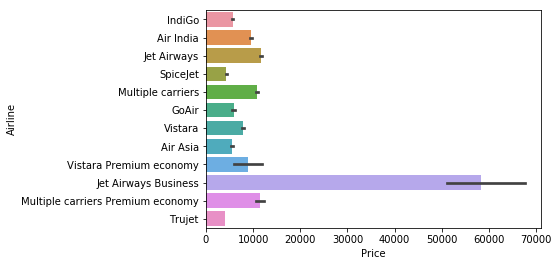

In [18]:
sns.barplot(x = 'Price',y = 'Airline',data =train_df)

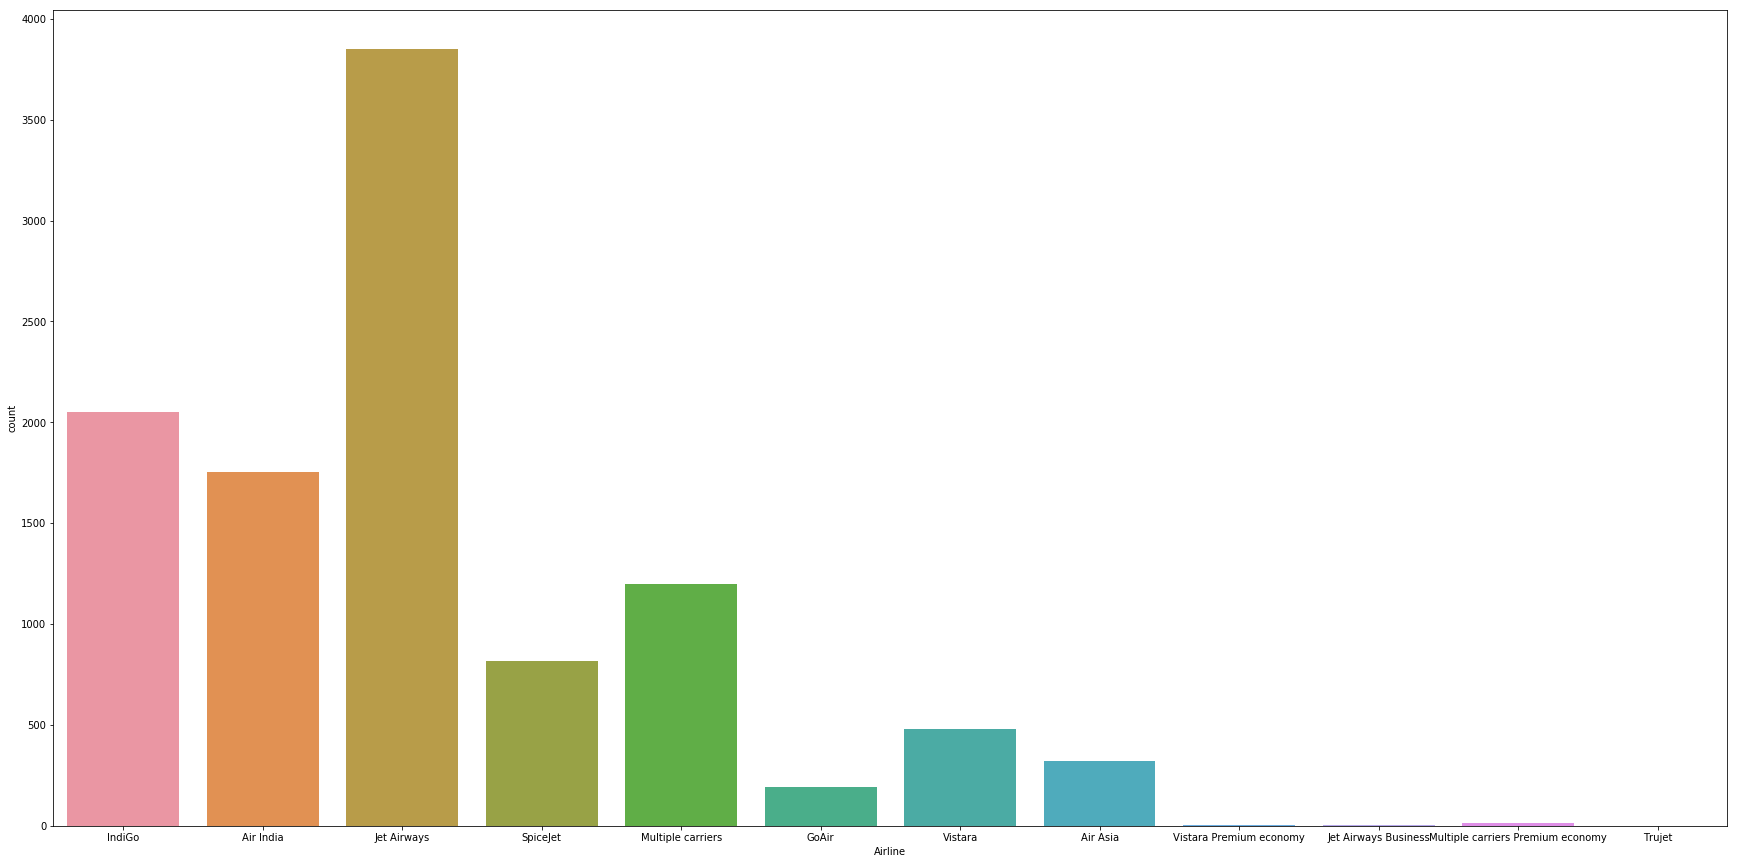

In [19]:
plt.figure(figsize=(30,15))
sns.countplot(x = 'Airline',data =train_df)

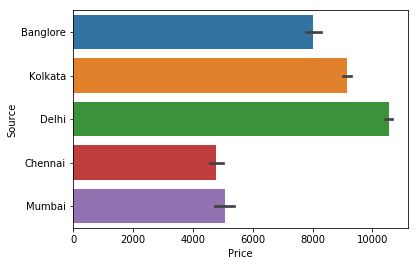

In [20]:

sns.barplot(x = 'Price',y = 'Source',data =train_df)

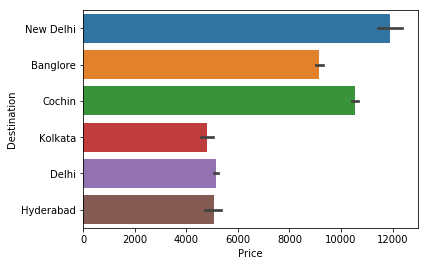

In [21]:
sns.barplot(x = 'Price',y = 'Destination',data =train_df)

Text(0,0.5,'Number')

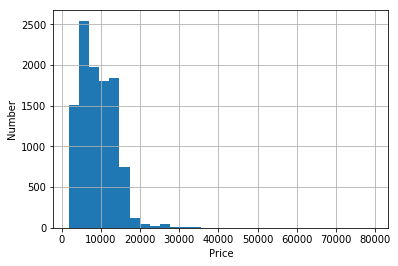

In [22]:
fig =train_df.Price.hist(bins=30)
fig.set_xlabel('Price')
fig.set_ylabel('Number')

In [23]:
test_df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Date,Month,Year
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,2019
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5,2019
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,2019
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5,2019
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,6,6,2019
2667,IndiGo,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,27,3,2019
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,6,3,2019
2669,Air India,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,6,3,2019


In [24]:
train_df['Arrival_Time']=train_df['Arrival_Time'].str.split(' ').str[0]
test_df['Arrival_Time']=test_df['Arrival_Time'].str.split(' ').str[0]

In [25]:
train_df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019


In [26]:
train_df[train_df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
9039,Air India,Delhi,Cochin,NaN,09:45,09:25,23h 40m,NaN,No info,7480,6,5,2019


In [27]:
train_df['Total_Stops']=train_df['Total_Stops'].fillna('1 stop')

In [28]:
train_df['Total_Stops']=train_df['Total_Stops'].replace('non-stop','0 stop')

In [29]:
train_df['Stops']=train_df['Total_Stops'].str.split(' ').str[0] 

In [30]:
train_df['Stops']=train_df['Stops'].astype(int)

In [31]:
train_df=train_df.drop(['Total_Stops'],axis=1)
train_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Price,Date,Month,Year,Stops
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,No info,3897,24,3,2019,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,No info,7662,1,5,2019,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,No info,13882,9,6,2019,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,No info,6218,12,5,2019,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,No info,13302,1,3,2019,1


In [32]:

train_df['Arrival_Hour'] = train_df['Arrival_Time'] .str.split(':').str[0]
train_df['Arrival_Minute'] =train_df['Arrival_Time'] .str.split(':').str[1]

In [33]:

test_df['Arrival_Hour'] = test_df['Arrival_Time'] .str.split(':').str[0]
test_df['Arrival_Minute'] =test_df['Arrival_Time'] .str.split(':').str[1]

In [34]:

train_df['Arrival_Hour']=train_df['Arrival_Hour'].astype(int)
train_df['Arrival_Minute']=train_df['Arrival_Minute'].astype(int)
train_df=train_df.drop(['Arrival_Time'],axis=1)

In [35]:

test_df['Arrival_Hour']=test_df['Arrival_Hour'].astype(int)
test_df['Arrival_Minute']=test_df['Arrival_Minute'].astype(int)
test_df=test_df.drop(['Arrival_Time'],axis=1)

In [36]:
train_df.isnull().sum()

Airline            0
Source             0
Destination        0
Route              1
Dep_Time           0
Duration           0
Additional_Info    0
Price              0
Date               0
Month              0
Year               0
Stops              0
Arrival_Hour       0
Arrival_Minute     0
dtype: int64

In [37]:

train_df['Departure_Hour'] = train_df['Dep_Time'] .str.split(':').str[0]
train_df['Departure_Minute'] =train_df['Dep_Time'] .str.split(':').str[1]


In [38]:
test_df['Departure_Hour'] = test_df['Dep_Time'] .str.split(':').str[0]
test_df['Departure_Minute'] =test_df['Dep_Time'] .str.split(':').str[1]

In [39]:

train_df['Departure_Hour']=train_df['Departure_Hour'].astype(int)
train_df['Departure_Minute']=train_df['Departure_Minute'].astype(int)
train_df=train_df.drop(['Dep_Time'],axis=1)

In [40]:

test_df['Departure_Hour']=test_df['Departure_Hour'].astype(int)
test_df['Departure_Minute']=test_df['Departure_Minute'].astype(int)
test_df=test_df.drop(['Dep_Time'],axis=1)

In [41]:
train_df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [42]:
train_df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration',
       'Additional_Info', 'Price', 'Date', 'Month', 'Year', 'Stops',
       'Arrival_Hour', 'Arrival_Minute', 'Departure_Hour', 'Departure_Minute'],
      dtype='object')

In [43]:
train_df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [44]:
train_df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [45]:
train_df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [46]:
test_df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,2019,4,25,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,2019,10,20,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,2019,19,0,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,2019,21,0,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,2019,2,45,23,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,23h 55m,1 stop,No info,6,6,2019,20,25,20,30
2667,IndiGo,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,27,3,2019,16,55,14,20
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,6h 35m,1 stop,No info,6,3,2019,4,25,21,50
2669,Air India,Delhi,Cochin,DEL → BOM → COK,15h 15m,1 stop,No info,6,3,2019,19,15,4,0


In [47]:
train_df['Route_1']=train_df['Route'].str.split('→ ').str[0]
train_df['Route_2']=train_df['Route'].str.split('→ ').str[1]
train_df['Route_3']=train_df['Route'].str.split('→ ').str[2]
train_df['Route_4']=train_df['Route'].str.split('→ ').str[3]
train_df['Route_5']=train_df['Route'].str.split('→ ').str[4]

In [48]:
test_df['Route_1']=test_df['Route'].str.split('→ ').str[0]
test_df['Route_2']=test_df['Route'].str.split('→ ').str[1]
test_df['Route_3']=test_df['Route'].str.split('→ ').str[2]
test_df['Route_4']=test_df['Route'].str.split('→ ').str[3]
test_df['Route_5']=test_df['Route'].str.split('→ ').str[4]

In [49]:
train_df['Route_1'].fillna("None",inplace=True)
train_df['Route_2'].fillna("None",inplace=True)
train_df['Route_3'].fillna("None",inplace=True)
train_df['Route_4'].fillna("None",inplace=True)
train_df['Route_5'].fillna("None",inplace=True)

In [50]:
test_df['Route_1'].fillna("None",inplace=True)
test_df['Route_2'].fillna("None",inplace=True)
test_df['Route_3'].fillna("None",inplace=True)
test_df['Route_4'].fillna("None",inplace=True)
test_df['Route_5'].fillna("None",inplace=True)

In [51]:
train_df.head(3)

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,Stops,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897,24,3,2019,0,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,None


In [52]:
train_df['Duration_hour']=train_df.Duration.str.split(' ').str[0]
train_df['Duration_min']=train_df.Duration.str.split(' ').str[1]


# train_df['Dur_hour']=train_df['Duration'].str.slice(0,1).astype(int)
# train_df['Duration_min']=test_df.Duration.str.slice(3,4).astype(int)
# ds_train['year']=ds_train.Timestamp.str.slice(0,4).astype(int)
# ds_train['month']=12-ds_train.Timestamp.str.slice(5,7).astype(int)

In [53]:
test_df['Duration_hour']=test_df.Duration.str.split(' ').str[0]
test_df['Duration_min']=test_df.Duration.str.split(' ').str[1]

In [54]:
train_df.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,...,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897,24,3,2019,...,10,22,20,BLR,DEL,None,None,None,2h,50m
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662,1,5,2019,...,15,5,50,CCU,IXR,BBI,BLR,None,7h,25m
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882,9,6,2019,...,25,9,25,DEL,LKO,BOM,COK,None,19h,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218,12,5,2019,...,30,18,5,CCU,NAG,BLR,None,None,5h,25m
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302,1,3,2019,...,35,16,50,BLR,NAG,DEL,None,None,4h,45m


In [55]:
train_df['Dur_hour']=train_df.Duration_hour.str.split('h').str[0]
train_df['Dur_min']=train_df.Duration_min.str.split('m').str[0]


In [56]:
test_df['Dur_hour']=test_df.Duration_hour.str.split('h').str[0]
test_df['Dur_min']=test_df.Duration_min.str.split('m').str[0]


In [57]:
train_df.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,...,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5,Duration_hour,Duration_min,Dur_hour,Dur_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897,24,3,2019,...,20,BLR,DEL,None,None,None,2h,50m,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662,1,5,2019,...,50,CCU,IXR,BBI,BLR,None,7h,25m,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882,9,6,2019,...,25,DEL,LKO,BOM,COK,None,19h,NaN,19,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218,12,5,2019,...,5,CCU,NAG,BLR,None,None,5h,25m,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302,1,3,2019,...,50,BLR,NAG,DEL,None,None,4h,45m,4,45


In [58]:
test_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Date,Month,Year,...,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5,Duration_hour,Duration_min,Dur_hour,Dur_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,2019,...,30,DEL,BOM,COK,None,None,10h,55m,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,2019,...,20,CCU,MAA,BLR,None,None,4h,NaN,4,NaN
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,2019,...,15,DEL,BOM,COK,None,None,23h,45m,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,2019,...,0,DEL,BOM,COK,None,None,13h,NaN,13,NaN
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,2019,...,55,BLR,DEL,None,None,None,2h,50m,2,50


In [59]:
train_df['Dur_min'].fillna("0",inplace=True)
train_df['Dur_hour'].fillna("0",inplace=True)


In [60]:
test_df['Dur_min'].fillna("0",inplace=True)
test_df['Dur_hour'].fillna("0",inplace=True)

In [61]:
train_df['Dur_hour'].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '5m', '41', '40'], dtype=object)

In [62]:
test_df['Dur_hour'].unique()

array(['10', '4', '23', '13', '2', '18', '15', '5', '6', '28', '9', '17',
       '12', '14', '11', '25', '19', '7', '3', '1', '27', '26', '8', '21',
       '16', '22', '33', '24', '38', '20', '35', '31', '34', '29', '30',
       '37', '36', '39', '32', '40', '5m'], dtype=object)

In [63]:
train_df['Dur_hour']=train_df['Dur_hour'].replace('5m','0')
test_df['Dur_hour']=train_df['Dur_hour'].replace('5m','0')

In [64]:
train_df['Dur_hour'].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '0', '41', '40'], dtype=object)

In [65]:
test_df['Dur_hour'].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33'], dtype=object)

In [66]:
train_df['Dur_hour']=train_df['Dur_hour'].astype(int)
train_df['Dur_min']=train_df['Dur_min'].astype(int)

In [67]:
test_df['Dur_hour']=test_df['Dur_hour'].astype(int)
test_df['Dur_min']=test_df['Dur_min'].astype(int)

In [68]:
train_df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Duration            object
Additional_Info     object
Price                int64
Date                 int32
Month                int32
Year                 int32
Stops                int32
Arrival_Hour         int32
Arrival_Minute       int32
Departure_Hour       int32
Departure_Minute     int32
Route_1             object
Route_2             object
Route_3             object
Route_4             object
Route_5             object
Duration_hour       object
Duration_min        object
Dur_hour             int32
Dur_min              int32
dtype: object

In [69]:
train_df['Total_Duration']=train_df['Dur_hour']*60+train_df['Dur_min']

In [70]:
test_df['Total_Duration']=test_df['Dur_hour']*60+test_df['Dur_min']

In [71]:
train_df_2=train_df.copy().drop(columns=['Duration','Duration_hour','Duration_min','Dur_hour','Dur_min'])
train_df_2=train_df_2.drop(columns=['Route'])

In [72]:
train_df_2.dtypes

Airline             object
Source              object
Destination         object
Additional_Info     object
Price                int64
Date                 int32
Month                int32
Year                 int32
Stops                int32
Arrival_Hour         int32
Arrival_Minute       int32
Departure_Hour       int32
Departure_Minute     int32
Route_1             object
Route_2             object
Route_3             object
Route_4             object
Route_5             object
Total_Duration       int32
dtype: object

In [73]:
train_df_2.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Stops,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5,Total_Duration
0,IndiGo,Banglore,New Delhi,No info,3897,24,3,2019,0,1,10,22,20,BLR,DEL,None,None,None,170
1,Air India,Kolkata,Banglore,No info,7662,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,None,445
2,Jet Airways,Delhi,Cochin,No info,13882,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,None,1140
3,IndiGo,Kolkata,Banglore,No info,6218,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,None,None,325
4,IndiGo,Banglore,New Delhi,No info,13302,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,None,None,285


In [74]:

test_df_2=test_df.copy().drop(columns=['Duration','Duration_hour','Duration_min','Dur_hour','Dur_min','Year'])


In [75]:
test_df_2.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Date,Month,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5,Total_Duration
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,4,25,17,30,DEL,BOM,COK,None,None,175
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,10,20,6,20,CCU,MAA,BLR,None,None,420
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,19,0,19,15,DEL,BOM,COK,None,None,1185
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,21,0,8,0,DEL,BOM,COK,None,None,300
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,2,45,23,55,BLR,DEL,None,None,None,290


In [76]:
test_df_2.isnull().sum()

Airline             0
Source              0
Destination         0
Route               0
Total_Stops         0
Additional_Info     0
Date                0
Month               0
Arrival_Hour        0
Arrival_Minute      0
Departure_Hour      0
Departure_Minute    0
Route_1             0
Route_2             0
Route_3             0
Route_4             0
Route_5             0
Total_Duration      0
dtype: int64

In [77]:
test_df_2['Total_Stops']=test_df_2['Total_Stops'].replace('non-stop','0 stop')

In [78]:
test_df_2['Stops']=test_df_2['Total_Stops'].str.split(' ').str[0] 

In [79]:
test_df_2['Stops']=test_df_2['Stops'].astype(int)

In [80]:
test_df_3=test_df_2.copy().drop(columns=['Route','Total_Stops'])

In [81]:
test_df_3.head()

,Airline,Source,Destination,Additional_Info,Date,Month,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5,Total_Duration,Stops
0,Jet Airways,Delhi,Cochin,No info,6,6,4,25,17,30,DEL,BOM,COK,None,None,175,1
1,IndiGo,Kolkata,Banglore,No info,12,5,10,20,6,20,CCU,MAA,BLR,None,None,420,1
2,Jet Airways,Delhi,Cochin,In-flight meal not included,21,5,19,0,19,15,DEL,BOM,COK,None,None,1185,1
3,Multiple carriers,Delhi,Cochin,No info,21,5,21,0,8,0,DEL,BOM,COK,None,None,300,1
4,Air Asia,Banglore,Delhi,No info,24,6,2,45,23,55,BLR,DEL,None,None,None,290,0


In [82]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
train_df_2["Airline"]=encoder.fit_transform(train_df_2['Airline'])
train_df_2["Source"]=encoder.fit_transform(train_df_2['Source'])
train_df_2["Destination"]=encoder.fit_transform(train_df_2['Destination'])
train_df_2["Additional_Info"]=encoder.fit_transform(train_df_2['Additional_Info'])
train_df_2["Route_1"]=encoder.fit_transform(train_df_2['Route_1'])
train_df_2["Route_2"]=encoder.fit_transform(train_df_2['Route_2'])
train_df_2["Route_3"]=encoder.fit_transform(train_df_2['Route_3'])
train_df_2["Route_4"]=encoder.fit_transform(train_df_2['Route_4'])
train_df_2["Route_5"]=encoder.fit_transform(train_df_2['Route_5'])

In [83]:
train_df_2

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Stops,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5,Total_Duration
0,3,0,5,8,3897,24,3,2019,0,1,10,22,20,0,13,24,12,4,170
1,1,3,0,8,7662,1,5,2019,2,13,15,5,50,2,25,1,3,4,445
2,4,2,1,8,13882,9,6,2019,2,4,25,9,25,3,32,4,5,4,1140
3,3,3,0,8,6218,12,5,2019,1,23,30,18,5,2,34,3,12,4,325
4,3,0,5,8,13302,1,3,2019,1,21,35,16,50,0,34,8,12,4,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,8,4107,9,4,2019,0,22,25,19,55,2,5,24,12,4,150
10679,1,3,0,8,4145,27,4,2019,0,23,20,20,45,2,5,24,12,4,155
10680,4,0,2,8,7229,27,4,2019,0,11,20,8,20,0,13,24,12,4,180
10681,10,0,5,8,12648,1,3,2019,0,14,10,11,30,0,13,24,12,4,160


In [84]:
test_df_3["Airline"]=encoder.fit_transform(test_df_3['Airline'])
test_df_3["Source"]=encoder.fit_transform(test_df_3['Source'])
test_df_3["Destination"]=encoder.fit_transform(test_df_3['Destination'])
test_df_3["Additional_Info"]=encoder.fit_transform(test_df_3['Additional_Info'])
test_df_3["Route_1"]=encoder.fit_transform(test_df_3['Route_1'])
test_df_3["Route_2"]=encoder.fit_transform(test_df_3['Route_2'])
test_df_3["Route_3"]=encoder.fit_transform(test_df_3['Route_3'])
test_df_3["Route_4"]=encoder.fit_transform(test_df_3['Route_4'])
test_df_3["Route_5"]=encoder.fit_transform(test_df_3['Route_5'])

In [85]:
test_df_3

,Airline,Source,Destination,Additional_Info,Date,Month,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5,Total_Duration,Stops
0,4,2,1,5,6,6,4,25,17,30,3,7,5,8,3,175,1
1,3,3,0,5,12,5,10,20,6,20,2,29,3,8,3,420,1
2,4,2,1,3,21,5,19,0,19,15,3,7,5,8,3,1185,1
3,6,2,1,5,21,5,21,0,8,0,3,7,5,8,3,300,1
4,0,0,2,5,24,6,2,45,23,55,0,13,21,8,3,290,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,5,6,6,20,25,20,30,2,14,3,8,3,1675,1
2667,3,3,0,5,27,3,16,55,14,20,2,5,21,8,3,155,0
2668,4,2,1,5,6,3,4,25,21,50,3,7,5,8,3,1235,1
2669,1,2,1,5,6,3,19,15,4,0,3,7,5,8,3,135,1


In [86]:
train_df_2.dtypes

Airline             int32
Source              int32
Destination         int32
Additional_Info     int32
Price               int64
Date                int32
Month               int32
Year                int32
Stops               int32
Arrival_Hour        int32
Arrival_Minute      int32
Departure_Hour      int32
Departure_Minute    int32
Route_1             int32
Route_2             int32
Route_3             int32
Route_4             int32
Route_5             int32
Total_Duration      int32
dtype: object

In [87]:
test_df_3.dtypes

Airline             int32
Source              int32
Destination         int32
Additional_Info     int32
Date                int32
Month               int32
Arrival_Hour        int32
Arrival_Minute      int32
Departure_Hour      int32
Departure_Minute    int32
Route_1             int32
Route_2             int32
Route_3             int32
Route_4             int32
Route_5             int32
Total_Duration      int32
Stops               int32
dtype: object

In [88]:
train_df_2.shape

(10683, 19)

In [1]:
train_df_2.groupby('Total_Duration')['Price'].median().plot()
plt.xlabel(' Duration')
plt.ylabel('Price')
plt.title(" Flight Duration vs price")

NameError: name 'train_df_2' is not defined

In [90]:
train_df_2['Year'].unique()

array([2019], dtype=int64)

Text(0.5,1,'stops vs price')

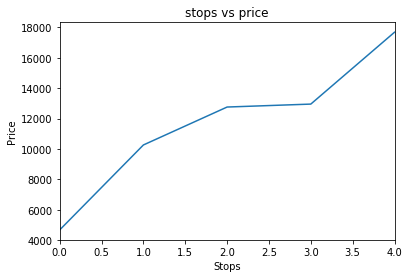

In [91]:
train_df_2.groupby('Stops')['Price'].median().plot()
plt.xlabel('Stops')
plt.ylabel('Price')
plt.title("stops vs price")

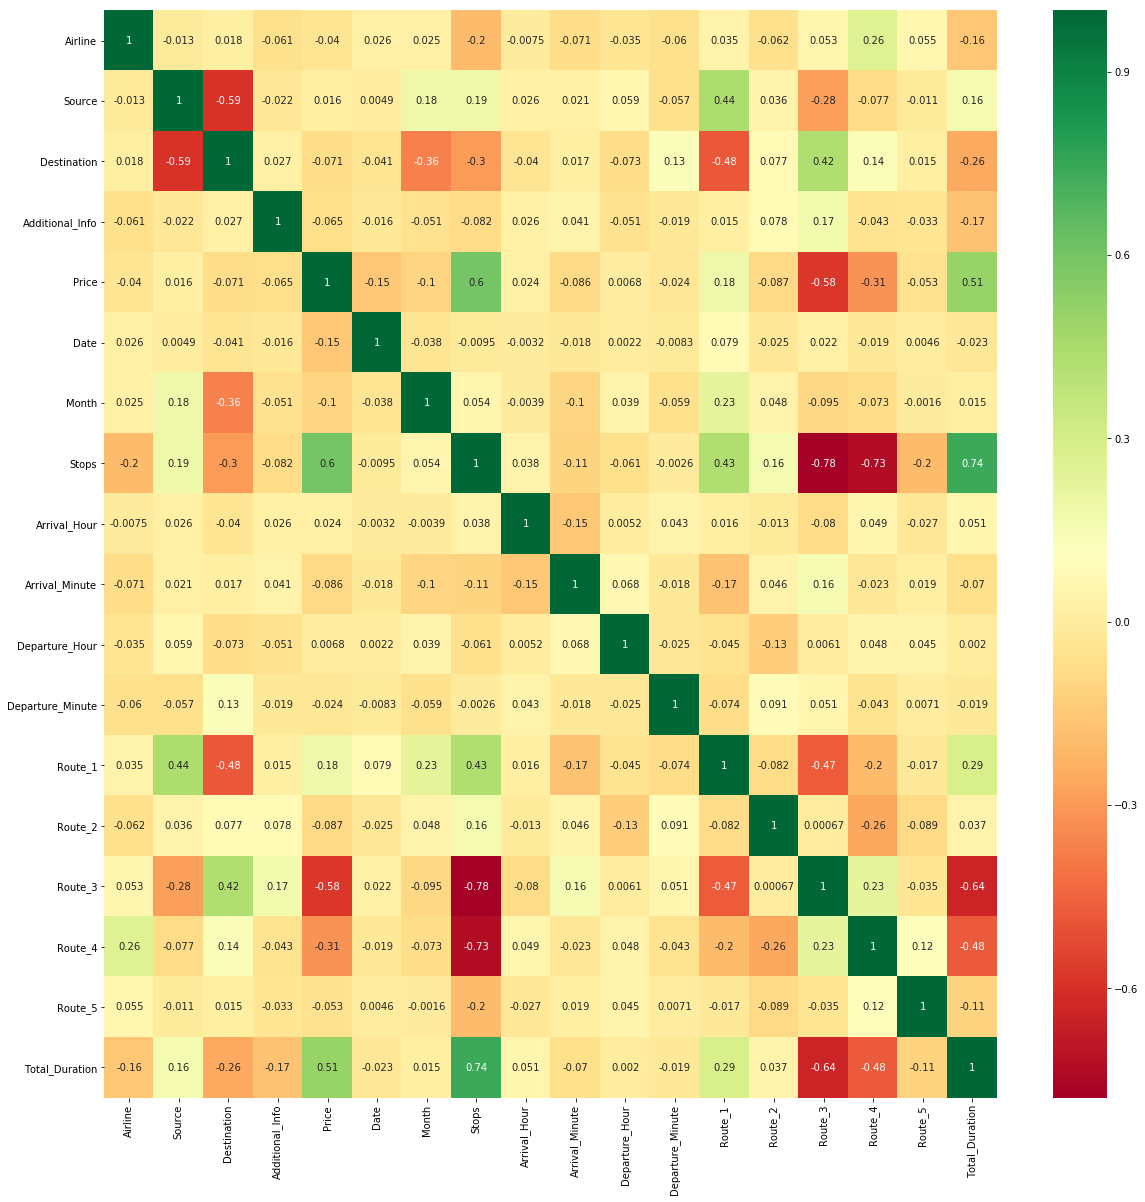

In [92]:
ds=train_df_2.copy().drop(columns=['Year'])
import seaborn as sns
corrmat =ds.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(ds[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [93]:
train_df_2

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Stops,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5,Total_Duration
0,3,0,5,8,3897,24,3,2019,0,1,10,22,20,0,13,24,12,4,170
1,1,3,0,8,7662,1,5,2019,2,13,15,5,50,2,25,1,3,4,445
2,4,2,1,8,13882,9,6,2019,2,4,25,9,25,3,32,4,5,4,1140
3,3,3,0,8,6218,12,5,2019,1,23,30,18,5,2,34,3,12,4,325
4,3,0,5,8,13302,1,3,2019,1,21,35,16,50,0,34,8,12,4,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,8,4107,9,4,2019,0,22,25,19,55,2,5,24,12,4,150
10679,1,3,0,8,4145,27,4,2019,0,23,20,20,45,2,5,24,12,4,155
10680,4,0,2,8,7229,27,4,2019,0,11,20,8,20,0,13,24,12,4,180
10681,10,0,5,8,12648,1,3,2019,0,14,10,11,30,0,13,24,12,4,160


In [94]:
# sns.boxplot(x = 'Price',y = 'Total_Duration', data =ds)

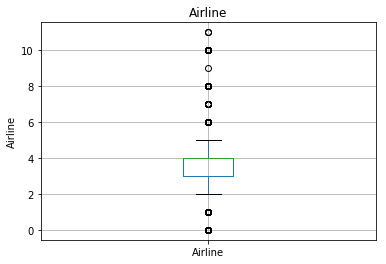

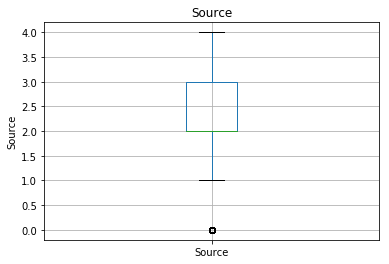

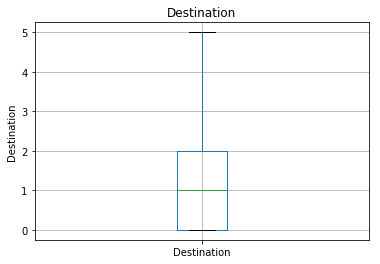

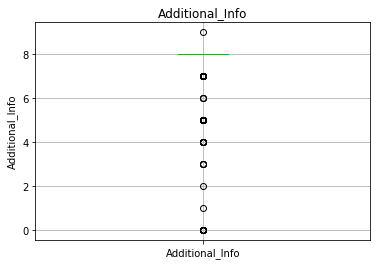

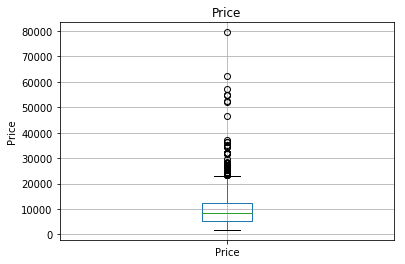

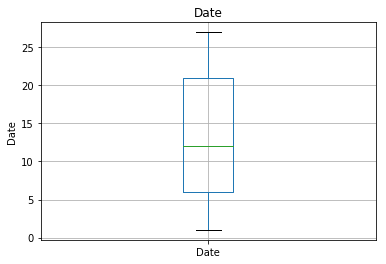

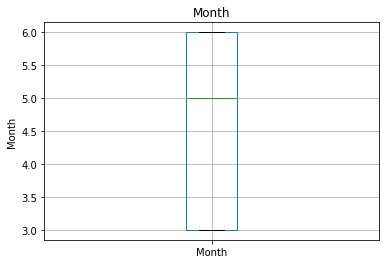

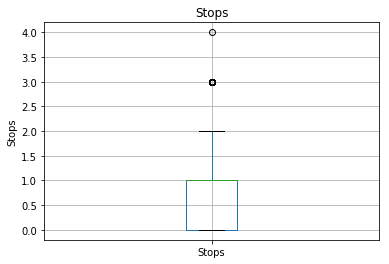

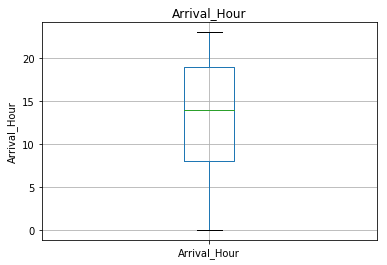

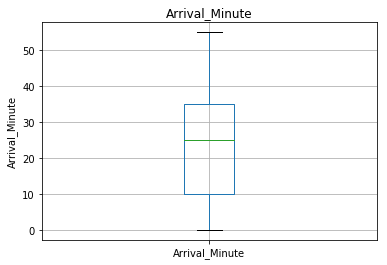

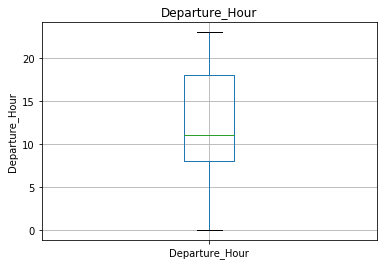

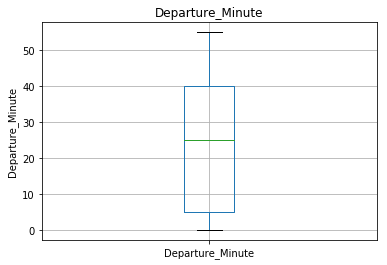

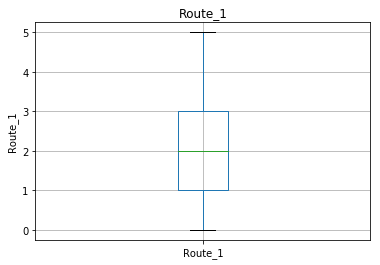

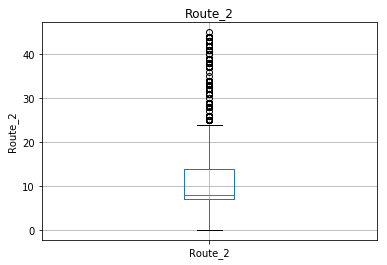

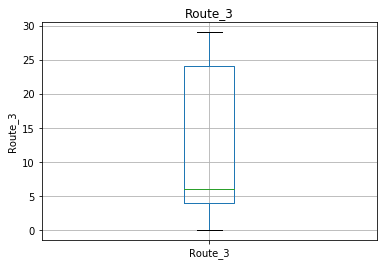

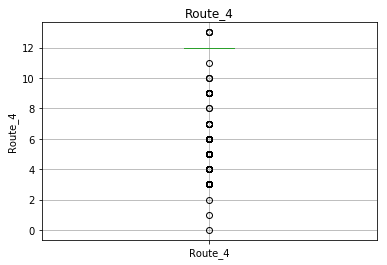

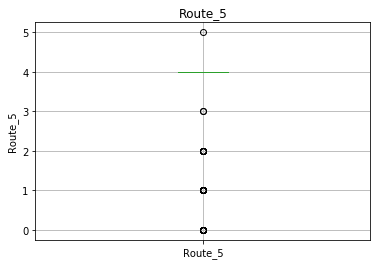

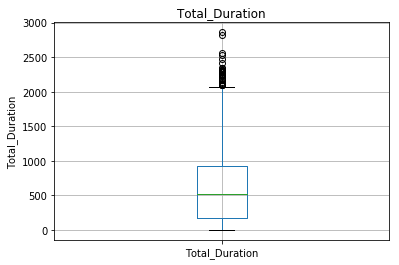

In [95]:
for feature in ds:
    data=ds.copy()
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [96]:
Q1 = ds['Price'].quantile(0.25)
Q3 = ds['Price'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

7096.0


In [97]:
ds2=ds[~((ds< (Q1 -1.5* IQR)) |(ds > (Q3 + 1.5* IQR))).any(axis=1)]

In [98]:
ds2.shape

(10589, 18)

In [99]:
ds.shape

(10683, 18)

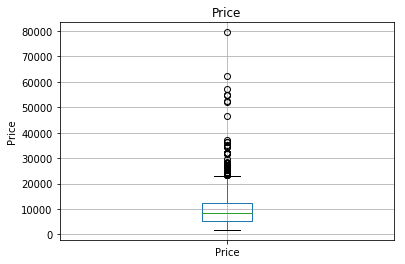

In [100]:
ds.boxplot(column='Price')
plt.ylabel('Price')
plt.title('Price')
plt.show()

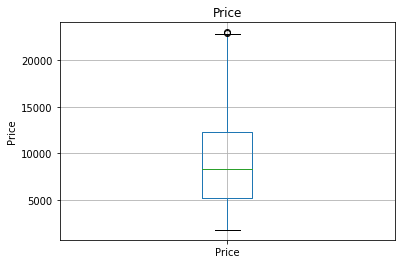

In [101]:
ds2.boxplot(column='Price')
plt.ylabel('Price')
plt.title('Price')
plt.show()

In [102]:
Target=ds2['Price']

In [103]:
ds_train=ds2.copy().drop(columns=['Price'])

In [104]:
ds_train.shape

(10589, 17)

In [105]:
ds_train.columns


Index(['Airline', 'Source', 'Destination', 'Additional_Info', 'Date', 'Month',
       'Stops', 'Arrival_Hour', 'Arrival_Minute', 'Departure_Hour',
       'Departure_Minute', 'Route_1', 'Route_2', 'Route_3', 'Route_4',
       'Route_5', 'Total_Duration'],
      dtype='object')

In [106]:
ds_train['Airline'].unique()

array([ 3,  1,  4,  8,  6,  2, 10,  0, 11,  7,  9], dtype=int64)

In [107]:
ds_train['Source'].unique()

array([0, 3, 2, 1, 4], dtype=int64)

In [108]:
inverted = encoder.inverse_transform([0,1,2,3,4])

In [109]:
inverted

array(['BLR', 'COK', 'DEL', 'None', 'VGA '], dtype=object)

In [110]:
ds_train['Destination'].unique()

array([5, 0, 1, 4, 2, 3], dtype=int64)

In [111]:
ds_train['Additional_Info'].unique()

array([8, 5, 7, 6, 0, 4, 9], dtype=int64)

In [112]:
ds_train['Route_1'].unique()

array([0, 2, 3, 4, 1, 5], dtype=int64)

In [113]:
ds_train['Route_2'].unique()

array([13, 25, 32, 34,  5,  7,  6,  8,  0, 38,  9, 11, 21, 15, 33, 20, 10,
       14, 19,  4, 28,  1, 29,  2, 16,  3, 41, 26, 23, 42, 39, 12, 43, 44,
       24, 37, 30, 31, 17, 45, 35, 27, 18, 22, 40, 36], dtype=int64)

In [114]:
ds_train['Route_3'].unique()

array([24,  1,  4,  3,  8,  6,  9,  0, 13, 21, 22,  7, 11, 23, 10,  2, 19,
       15, 17, 14, 28, 25, 20, 26, 12, 16,  5, 27, 29, 18], dtype=int64)

In [115]:
ds_train['Route_4'].unique()

array([12,  3,  5,  6,  4,  7,  9, 10,  8, 13,  1,  2,  0, 11],
      dtype=int64)

In [116]:
ds_train['Route_5'].unique()

array([4, 1, 0, 2, 3, 5], dtype=int64)

In [117]:
ds_train

,Airline,Source,Destination,Additional_Info,Date,Month,Stops,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5,Total_Duration
0,3,0,5,8,24,3,0,1,10,22,20,0,13,24,12,4,170
1,1,3,0,8,1,5,2,13,15,5,50,2,25,1,3,4,445
2,4,2,1,8,9,6,2,4,25,9,25,3,32,4,5,4,1140
3,3,3,0,8,12,5,1,23,30,18,5,2,34,3,12,4,325
4,3,0,5,8,1,3,1,21,35,16,50,0,34,8,12,4,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,8,9,4,0,22,25,19,55,2,5,24,12,4,150
10679,1,3,0,8,27,4,0,23,20,20,45,2,5,24,12,4,155
10680,4,0,2,8,27,4,0,11,20,8,20,0,13,24,12,4,180
10681,10,0,5,8,1,3,0,14,10,11,30,0,13,24,12,4,160


In [118]:
test_df_3

,Airline,Source,Destination,Additional_Info,Date,Month,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5,Total_Duration,Stops
0,4,2,1,5,6,6,4,25,17,30,3,7,5,8,3,175,1
1,3,3,0,5,12,5,10,20,6,20,2,29,3,8,3,420,1
2,4,2,1,3,21,5,19,0,19,15,3,7,5,8,3,1185,1
3,6,2,1,5,21,5,21,0,8,0,3,7,5,8,3,300,1
4,0,0,2,5,24,6,2,45,23,55,0,13,21,8,3,290,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,5,6,6,20,25,20,30,2,14,3,8,3,1675,1
2667,3,3,0,5,27,3,16,55,14,20,2,5,21,8,3,155,0
2668,4,2,1,5,6,3,4,25,21,50,3,7,5,8,3,1235,1
2669,1,2,1,5,6,3,19,15,4,0,3,7,5,8,3,135,1


In [119]:
ds_train_final=ds_train
ds_train_final['Arrival_time']=ds_train['Arrival_Hour']+ds_train['Arrival_Minute']/60
ds_train_final['Departure_time']=ds_train['Departure_Hour']+ds_train['Departure_Minute']/60
ds_train_final['Total_Duration']=ds_train['Total_Duration']/60

In [120]:
ds_train_final.head(2)

,Airline,Source,Destination,Additional_Info,Date,Month,Stops,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5,Total_Duration,Arrival_time,Departure_time
0,3,0,5,8,24,3,0,1,10,22,20,0,13,24,12,4,2.833333,1.166667,22.333333
1,1,3,0,8,1,5,2,13,15,5,50,2,25,1,3,4,7.416667,13.250000,5.833333


In [121]:
ds_train_final=ds_train_final.copy().drop(columns=['Arrival_Hour','Arrival_Minute','Departure_Hour','Departure_Minute'])

In [122]:
ds_train_final.head(2)

,Airline,Source,Destination,Additional_Info,Date,Month,Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Total_Duration,Arrival_time,Departure_time
0,3,0,5,8,24,3,0,0,13,24,12,4,2.833333,1.166667,22.333333
1,1,3,0,8,1,5,2,2,25,1,3,4,7.416667,13.250000,5.833333


In [123]:
ds_train_final.shape

(10589, 15)

In [124]:
test_df_3_final=test_df_3
test_df_3_final['Arrival_time']=test_df_3['Arrival_Hour']+test_df_3['Arrival_Minute']/60
test_df_3_final['Departure_time']=test_df_3['Departure_Hour']+test_df_3['Departure_Minute']/60
test_df_3_final['Total_Duration']=test_df_3['Total_Duration']/60

In [125]:
test_df_3_final=test_df_3.copy().drop(columns=['Arrival_Hour','Arrival_Minute','Departure_Hour','Departure_Minute'])

In [126]:
test_df_3_final.shape

(2671, 15)

In [162]:
test_df_3_final.head(2)

,Airline,Source,Destination,Additional_Info,Date,Month,Route_1,Route_2,Route_3,Route_4,Route_5,Total_Duration,Stops,Arrival_time,Departure_time
0,4,2,1,5,6,6,3,7,5,8,3,2.916667,1,4.416667,17.500000
1,3,3,0,5,12,5,2,29,3,8,3,7.000000,1,10.333333,6.333333


In [127]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [163]:
Target.shape

(10589,)

In [164]:
ds_train_final.shape

(10589, 15)

In [128]:

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
sc_x=MinMaxScaler()
data_train=sc_x.fit_transform(ds_train_final)
data_test=sc_x.fit_transform(test_df_3_final)

In [129]:
x_train,x_test,y_train,y_test=train_test_split(data_train,Target,test_size=0.2,random_state=12)

In [130]:
model_lasso=SelectFromModel(Lasso(alpha=0.005,random_state=0))

In [131]:
model_lasso.fit(x_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [132]:
model_lasso.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [133]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost
regressor=xgboost.XGBRegressor()

In [134]:

booster=['gbtree']
base_score=[0.25,0.5,0.75,1]
n_estimators = [100,200,300,400,500]
max_depth = [5,10,15,20,30,40]
learning_rate=[0.01,0.05,0.1,0.15,0.20]
min_child_weight=[1,2,4]
gamma=[0.0,0.2,0.5]
colsample_bytree=[0.7,0.8,0.9]
colsample_bylevel=[0.7,0.8,0.9]
colsample_bynode=[0.7,0.8,0.9]
subsample=[0.2, 0.4, 0.5, 0.6, 0.7]
reg_alpha=[0, 0.5, 1,2,3,5]
reg_lambda=[1, 1.5, 2, 3, 4.5]

In [135]:
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score,
    'gamma':gamma,
    'colsample_bytree':colsample_bytree,
    'colsample_bylevel':colsample_bylevel,
    'colsample_bynode':colsample_bynode,
    'subsample':subsample,
    'reg_alpha':reg_alpha,
    'reg_lambda':reg_lambda
    }

In [136]:
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5,
            n_iter=10,
            scoring ='neg_mean_squared_log_error',
            n_jobs = -1,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [137]:
random_cv.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed:   47.7s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   51.6s finished
C:\Users\ankit\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:32:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                                        'learning_rate': [0.01, 0.05, 0.1, 0.15,
                                                          0.2],
                                        'ma

In [138]:
random_cv.best_estimator_

XGBRegressor(base_score=0.75, booster='gbtree', colsample_bylevel=0.8,
             colsample_bynode=0.7, colsample_bytree=0.9, gamma=0.5,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=10, min_child_weight=4, missing=None, n_estimators=300,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0.5, reg_lambda=3, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.5, verbosity=1)

In [139]:
regressor=xgboost.XGBRegressor(base_score=0.75, booster='gbtree', colsample_bylevel=0.8,colsample_bynode=0.7,
       colsample_bytree=0.9, gamma=0.5, learning_rate=0.05, max_delta_step=0,
       max_depth=10, min_child_weight=4, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0.5, reg_lambda=3, scale_pos_weight=1, seed=None,
       silent=None, subsample=0.5,verbosity=1)

In [140]:

regressor.fit(x_train,y_train)

C:\Users\ankit\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:32:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.75, booster='gbtree', colsample_bylevel=0.8,
             colsample_bynode=0.7, colsample_bytree=0.9, gamma=0.5,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=10, min_child_weight=4, missing=None, n_estimators=300,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0.5, reg_lambda=3, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.5, verbosity=1)

In [141]:

y_pred=regressor.predict(x_test)

In [142]:
from sklearn.metrics import mean_squared_log_error

In [143]:

print("XGBoost Regressor 1-RMSLE:",1 - mean_squared_log_error(y_test,y_pred)**0.5)

XGBoost Regressor 1-RMSLE: 0.8889316773467765


In [144]:
prediction=regressor.predict(data_test)

In [145]:
ID = pd.DataFrame(prediction,columns = ['Price'])

In [146]:
ID.to_excel('flightPredction_feb_5.xlsx',index = False)

In [148]:
pickle.dump(regressor,open('flight_model_xgboost.pkl','wb'))

In [149]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
reg2=RandomForestRegressor()
n_estimators = [100,200,300,400,500]
max_depth = [5,10,15,20,30,40]
min_samples_split=[5,10,15,20,30,40]
min_samples_leaf=[5,10,15,20,30,40] 

In [150]:
hyperparameter_grid_2 = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf
    }

In [151]:
grid_cv =  RandomizedSearchCV(reg2,hyperparameter_grid_2,cv=10,n_jobs = -1,verbose = 5,scoring ='neg_mean_squared_log_error',n_iter=10)

In [152]:
grid_cv.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.8min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                             

In [153]:
grid_cv.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=20, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [154]:
forestOpt =RandomForestRegressor(random_state = 1, max_depth = 20, n_estimators = 400, min_samples_split = 5, min_samples_leaf = 10)                                   
modelOpt = forestOpt.fit(x_train,y_train)
y_pred_2 = modelOpt.predict(x_test)

In [155]:
print("RandomForestRegressor 1-RMSLE:",1 - mean_squared_log_error(y_test,y_pred_2)**0.5)

RandomForestRegressor 1-RMSLE: 0.8615385909676105


In [156]:
prediction_2=modelOpt.predict(data_test)

In [157]:
ID_2= pd.DataFrame(prediction_2,columns = ['Price'])

In [158]:
# ID_2.to_excel('flightPredction_2_feb_5.xlsx',index = False)

In [159]:
pickle.dump(forestOpt,open('flight_model_forest.pkl','wb'))

In [ ]:
from sklearn.svm import SVR
svr = SVR()

In [ ]:
kernel= ['rbf']
gamma=[1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9,1,3,5]
C=[1, 10, 100, 1000, 10000,1e5]
hyperparameter_SVR = {
    'kernel':kernel,
    'gamma':gamma,
    'C':C
     }

In [ ]:
svr=RandomizedSearchCV(SVR(epsilon = 0.01), hyperparameter_SVR, cv = 10, n_jobs = -1,verbose = 5)
svr.fit(x_train,y_train)

In [ ]:
svr.best_estimator_

In [ ]:
_SVR_ = SVR(kernel='rbf',gamma=3,C=10000)                                   
reg3 =_SVR_.fit(x_train,y_train)
y_pred_3 = reg3.predict(x_test)

In [ ]:
print("Support Vector Regressor 1-RMSLE:",1 - mean_squared_log_error(y_test,y_pred_3)**0.5)

In [ ]:
prediction_3=reg3.predict(data_test)

In [ ]:
# ID_3= pd.DataFrame(prediction_3,columns = ['Price'])

In [ ]:
# ID_3.to_excel('flightPredction_3_feb_5.xlsx',index = False)